Name: Matthew Mitchell
Date: 10/24/16

##2 Quadtrees: 40


Quadtrees are a form of simplified clustering algorithm.
Given a set of features S ∈ R2 we seek to partition the space into segments 
    such that no more than k points are members of any single segment.
In quad trees this is done by recursively splitting the space into quadrants until this condition is met.
Write a program that allows a user to specify the number of points to be separated n and the threshold k.
Upon completion, your program should plot the space, segments, and points,
    it should report the total number of segments as well as the area of the space 
    with the most densely packed sub-segments (this definition is entirely up to you).
The two features used in your program (s1, s2 ∈ S) can be randomly generated within.
You may use the programming language if your choice to solve this problem.
Please provide your code so we can test your function.
Also please provide an estimate of your function’s complexity.

In [134]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import seaborn as sns
%matplotlib inline

:0: FutureWarning: IPython widgets are experimental and may change in the future.


###For each segment/quadrant we need the following:
####Bounds: Xmin, Xmax, Ymin, Ymax
####Points within quadrant [(s11, s12)...(sn1, sn2)]

In [191]:
def quadsplit(Xmin,Xmax,Ymin,Ymax,points,k,final_quadrants):
    Xmid = (Xmin + Xmax)/2.0
    Ymid = (Ymin + Ymax)/2.0
    #Quadrants will be in the form [Xmin, Xmax, Ymin, Ymax, Points, Density, Area]
    q1 = [Xmid, Xmax, Ymid, Ymax, [], 0, 0]
    q2 = [Xmin, Xmid, Ymid, Ymax, [], 0, 0]
    q3 = [Xmin, Xmid, Ymin, Ymid, [], 0, 0]
    q4 = [Xmid, Xmax, Ymin, Ymid, [], 0, 0]
    #All Quadrants will be defined as inclusive on the lower bound
    #and exclusive on the upper bound.
    
    #Below we iterate through the list of points from the parent segment
    #and assign each point to one of the sub quad-segments. (Linear Time)
    for point in points:
        if point[0]>=Xmid and point[1]>=Ymid:
            q1[4].append(point)
        elif point[0]<Xmid and point[1]>=Ymid:
            q2[4].append(point)
        elif point[0]<Xmid and point[1]<Ymid:
            q3[4].append(point)
        elif point[0]>=Xmid and point[1]<Ymid:
            q4[4].append(point)
            
    #Finally, now that the points are assigned to segments,
    #we determine whether the segment has less than K points 
    #or needs to be successively redivided via recursion. (Again, linear time)
    for q in [q1,q2,q3,q4]:
        if len(q[4])>k:
            #Recurse!
            quadsplit(q[0], q[1], q[2], q[3], q[4], k, final_quadrants)
        else:
            #Calculate density and save as finalized segment
            area = (q[1]-q[0])*(q[3]-q[2])
            density = len(q[4])/float(area)
            q[5]+= density
            q[6]+= area
            final_quadrants.append(q)
    return final_quadrants

##Demonstration of Initial Function

In [192]:
#quadsplit(Xmin,Xmax,Ymin,Ymax,points,k,final_quadrants)
Xmin, Xmax, Ymin, Ymax = -10, 10, -10, 10
Points = [(2,2),(3,2),(5,2)]
k = 2
# test_split = quadsplit(-10,10,-10,10, [(2,2),(3,2),(5,2)], 2, [])
test_split = quadsplit(Xmin,Xmax,Ymin,Ymax,Points,k,[])

In [210]:
len(test_split)

7

In [193]:
test_split

[[5.0, 10, 5.0, 10, [], 0.0, 25.0],
 [0.0, 5.0, 5.0, 10, [], 0.0, 25.0],
 [0.0, 5.0, 0.0, 5.0, [(2, 2), (3, 2)], 0.08, 25.0],
 [5.0, 10, 0.0, 5.0, [(5, 2)], 0.04, 25.0],
 [-10, 0.0, 0.0, 10, [], 0.0, 100.0],
 [-10, 0.0, -10, 0.0, [], 0.0, 100.0],
 [0.0, 10, -10, 0.0, [], 0.0, 100.0]]

##Defining Plotting Function

In [217]:
#Quadrants are of the form: [Xmid, Xmax, Ymid, Ymax, [Points], Density]
def plot_segments_and_points(quadrants):
    fig = plt.figure()
    quadrants = sorted(quadrants, key = lambda x: x[5], reverse=True)
    counter = 1
    print "There are", len(quadrants), "segments.", '\n'
    for q in quadrants:
        ax = fig.add_subplot(111)
        Xmin, Xmax, Ymin, Ymax, points = q[0], q[1], q[2], q[3], q[4]
        if counter == 1:
            ax.add_patch(patches.Rectangle((Xmin,Ymin),Xmax-Xmin,Ymax-Ymin, fill=False, edgecolor="red", linewidth=3))
            print "The densest segment's area is:", q[6]
            counter +=1
        elif counter == 2:
            ax.add_patch(patches.Rectangle((Xmin,Ymin),Xmax-Xmin,Ymax-Ymin, fill=False, edgecolor="orange", linewidth=2))
            print "The second densest segment's area is:", q[6]
            counter += 1
        elif counter == 3:
            ax.add_patch(patches.Rectangle((Xmin,Ymin),Xmax-Xmin,Ymax-Ymin, fill=False, edgecolor="yellow", linewidth=1))
            print "The third densest segment's area is:", q[6]
            counter += 1
        elif counter > 3:
            ax.add_patch(patches.Rectangle((Xmin,Ymin),Xmax-Xmin,Ymax-Ymin, fill=False))
            counter += 1
        # plt.Rectangle([2,2],1,1)
        plt.scatter([point[0] for point in points],[point[1] for point in points])
    return plt.show()

##Demonstration of Graphing

There are 7 segments. 

The densest segment's area is: 25.0
The second densest segment's area is: 25.0
The third densest segment's area is: 25.0


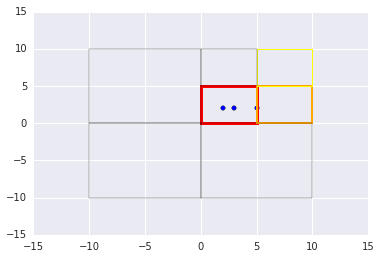

In [218]:
plot_segments_and_points(test_split)

##Final Definition; Linking Previous Functions along with N,K

In [202]:
def quadtrees(n,k):
    #Generate points within a space of arbitrary size (here -million to million)
    scale = 10**6
    points = 2*scale * np.random.random_sample((n,2)) - scale
    Xmin, Xmax, Ymin, Ymax = -scale, scale, -scale, scale
    segments_and_points = quadsplit(Xmin, Xmax, Ymin, Ymax, points, k, [])
    #Graph results
    plot_segments_and_points(segments_and_points)

##First Simulation

There are 46 segments.
The densest segment's area is: 62500000000.0
The second densest segment's area is: 62500000000.0
The third densest segment's area is: 62500000000.0


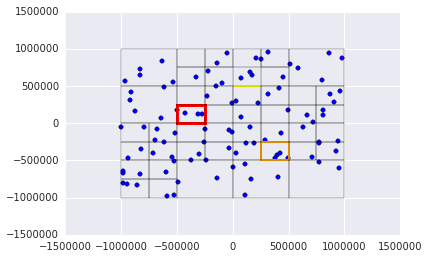

In [215]:
#100 Points; no more than 5 points per segment:
quadtrees(100,5)

##Second Simulation

There are 76 segments.
The densest segment's area is: 15625000000.0
The second densest segment's area is: 15625000000.0
The third densest segment's area is: 15625000000.0


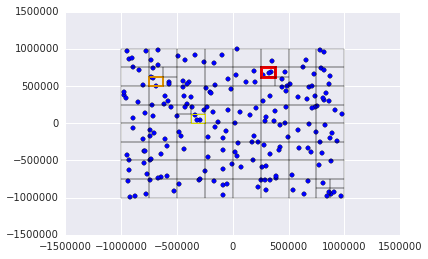

In [216]:
#200 Points; no more than 5 points per segment:
quadtrees(200,5)

Estimated Function Complexity:

    The Quadtrees Function I designed above works as follows:
    1. Randomly generate n points of the form (x,y); linear time based on n
    2a. Divide Space into 4 Quadrants; constant time
    2b. Assign Points to one of the 4 Quadrants; linear time based on n
    2c. Count number of points per quadrant and compare to n; linear time based on n
    2d. Recurse as necessary until all segments have less than n points. 
        *Potentially infinite if there are more than k points that are exactly the same.
    3. Sort all segments by density; n*log(n); standard python sort implemented using binary tree
    4. Plot points/segments, Print area of densest segments; linear time
    
    

Definition of Space Density:

"Area of the space with the most densely packed sub-segments (this definition is entirely up to you)"

One simplistic defnition of the space with the most desnely packed sub-segments could be the space with the largest number of sub-segments. This however would be trivial as the initial universal space itself would always be the most dense by this definition. Using the above implementation, other definitions fall into similar pitfalls because segments are always equally subdivided into 4 quadrants. For example, if we define density based of sub-segments divided by the area of the larger space, then we can do no better then four adjacent segments at the finest scale; even 16 of these sized segments forming a segment will produce the same segment:area ratio. 

The implementation shown above highlights the three segments with the hgighest density of points. Due to the recursive nature of the algorithm subdividing segements with greater than k points these regions will usually be of the smallest scale.

Thanks for taking a look at my work! I enjoyed working on this problem and am happy to submit work examples for any of the other challenges, or clarify any portion above. I look forward to continuing to talk with the Digitas team!

-Matt Mitchell